# Data Aggregation with Groupby

<center><img src="../images/stock/pexels-pixabay-210182.jpg"></center>

This lesson will guide you through the process of data aggregation using the `groupby()` method in Python's Pandas library. We'll use the "mpg" dataset from the Seaborn library for our examples.

## Getting Started - Import Libraries

First, we need to import the necessary libraries (Pandas and Seaborn).

```python
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
````

In [3]:
## Begin Example
!pip install seaborn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
## End Example

## Getting Started - Load Dataset

Now we load the dataset. The Seaborn library has several built-in datasets that we can easily refer to. 

For this lesson, we will focus on the `mpg` dataset.

```python
mpg_df = sns.load_dataset("mpg")
```

In [4]:
## Begin Example
mpg_df = sns.load_dataset("mpg")
mpg_df.info()
## End Example

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


## Split-Apply-Combine: The Concept Behind Groupby

<center><img src="../images/stock/pexels-arnie-chou-304906-1877271.jpg"></center>

The `groupby()` method is based on the split-apply-combine strategy:

* __Split:__ The data is divided into groups based on one or more columns.

* __Apply:__ You apply a function (e.g., mean, sum, count) to each group independently.

* __Combine:__ The results from each group are combined into a new data structure.

## Understanding Groupby

Let's break down the `groupby()` method step by step.

* What is a Groupby Object?

    * When you apply the `groupby()` method to a DataFrame, it doesn't immediately perform calculations. 
    * Instead, it creates a DataFrameGroupBy object. 
    * This object contains information about how the data has been split into groups, but the calculations are deferred until you specify an aggregation function.

__Syntax__

The basic syntax for `groupby()` is:

```python
df.groupby(by=column_name(s))
```

* `df`: The Pandas DataFrame you want to group.

* `by`: The column name (or a list of column names) that you want to group the data by.

## Example: Grouping by Cylinders

Let's group the `mpg_df` by the `cylinders` column:

In [5]:
## Begin Example
cylinders_grouped = mpg_df.groupby("cylinders")

cylinders_grouped

The output will show you a `DataFrameGroupBy` object, indicating that the data has been grouped, but no calculations have been performed yet.

## Applying Aggregation Functions

<center><img src="../images/stock/pexels-padrinan-3785930.jpg"></center>

Now, let's apply some aggregation functions to the grouped data.


### Mean

Calculate the average value for each group

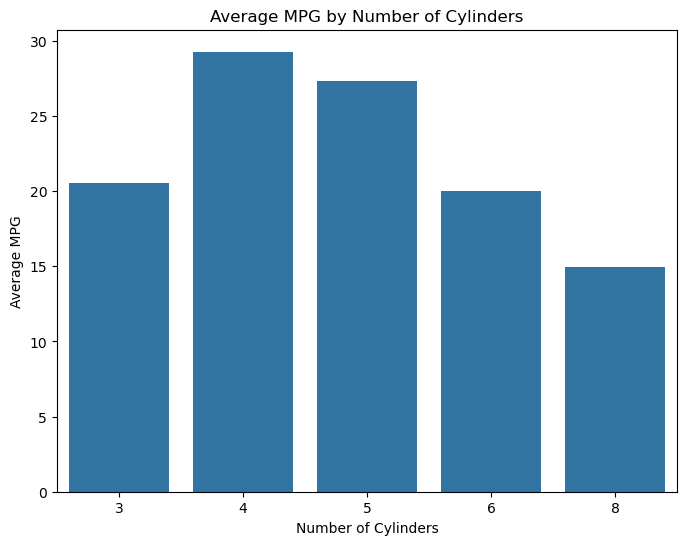

In [11]:
## Begin Example
numeric_mpg_df = mpg_df.select_dtypes(include=['number'])
cylinders_mean = numeric_mpg_df.groupby('cylinders').mean()

plt.figure(figsize=(8, 6))
sns.barplot(x=cylinders_mean.index, y=cylinders_mean['mpg'])
plt.title('Average MPG by Number of Cylinders')
plt.xlabel('Number of Cylinders')
plt.ylabel('Average MPG')
plt.show()
## End Example

### Sum

Calculate the sum of values for each group


In [12]:
cylinders_sum = cylinders_grouped.sum()
cylinders_sum

,mpg,displacement,horsepower,weight,acceleration,model_year,origin,name
cylinders,,,,,,,,
3,82.2,290.0,397.0,9594,53.0,302,japanjapanjapanjapan,mazda rx2 coupemaxda rx3mazda rx-4mazda rx-7 gs
4,5974.5,22398.5,15578.0,470858,3386.7,15723,japanjapaneuropeeuropeeuropeeuropeeuropejapanu...,toyota corona mark iidatsun pl510volkswagen 11...
5,82.1,435.0,247.0,9310,55.9,237,europeeuropeeurope,audi 5000mercedes benz 300daudi 5000s (diesel)
6,1678.8,18324.0,8425.0,268651,1366.1,6378,usausausausausausausausausausausausausausausau...,plymouth dusteramc hornetford maverickamc grem...
8,1541.2,35536.0,16305.0,423816,1334.4,7612,usausausausausausausausausausausausausausausau...,chevrolet chevelle malibubuick skylark 320plym...


## Selecting Columns

<center><img src="../images/stock/pexels-pixabay-159298.jpg"></center>

You can select specific columns before or after applying the `groupby()` method.

### Selecting Before Grouping

This can be more efficient if you only need to aggregate a subset of columns.

                 mpg  horsepower
cylinders                       
3          20.550000   99.250000
4          29.286765   78.281407
5          27.366667   82.333333
6          19.985714  101.506024
8          14.963107  158.300971


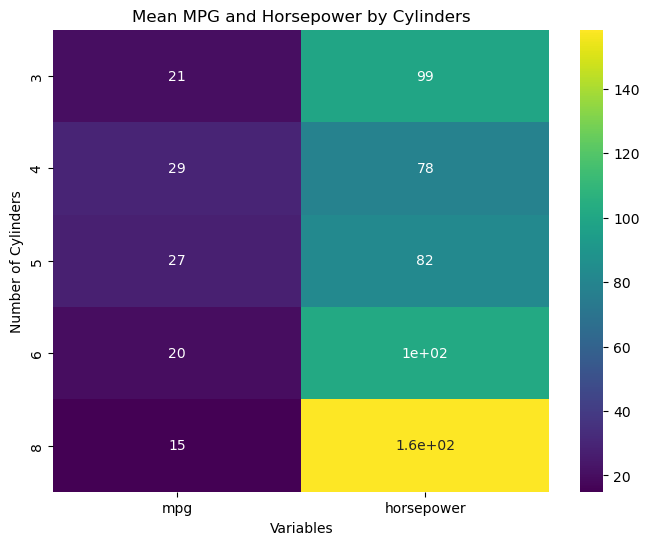

In [13]:
## Begin Example

cylinders_mpg_hp_mean = mpg_df[['mpg', 'horsepower', 'cylinders']].groupby('cylinders').mean()
print(cylinders_mpg_hp_mean)

plt.figure(figsize=(8, 6))
sns.heatmap(cylinders_mpg_hp_mean, annot=True, cmap='viridis')
plt.title('Mean MPG and Horsepower by Cylinders')
plt.xlabel('Variables')
plt.ylabel('Number of Cylinders')
plt.show()
## End Example

### Selecting After Grouping

You can select columns from the resulting aggregated DataFrame.

In [14]:
## Begin Example
# Group by 'cylinders', calculate the mean of all columns, and then select the 'mpg' column
cylinders_mean_mpg = mpg_df.groupby('cylinders').mean()['mpg']
print(cylinders_mean_mpg)

# Visualize
plt.figure(figsize=(8, 6))
plt.plot(cylinders_mean_mpg.index, cylinders_mean_mpg.values, marker='o')
plt.title('Average MPG by Number of Cylinders')
plt.xlabel('Number of Cylinders')
plt.ylabel('Average MPG')
plt.grid(True)
plt.show()
## End Example

TypeError: agg function failed [how->mean,dtype->object]

## Multiple Aggregations

You can apply multiple aggregation functions at once using the `agg()` method.

## Using a List

Apply different functions to the same column(s).

In [15]:
## Begin Example
# Group by 'cylinders' and calculate the mean and sum of 'mpg'
cylinders_mpg_agg = mpg_df.groupby('cylinders')['mpg'].agg(['mean', 'sum'])
cylinders_mpg_agg
## End Example

,mean,sum
cylinders,,
3,20.550000,82.2
4,29.286765,5974.5
5,27.366667,82.1
6,19.985714,1678.8
8,14.963107,1541.2


## Using a Dictionary

Apply different functions to different columns.

                 mpg  horsepower
cylinders                       
3          20.550000       397.0
4          29.286765     15578.0
5          27.366667       247.0
6          19.985714      8425.0
8          14.963107     16305.0


<Figure size 1000x600 with 0 Axes>

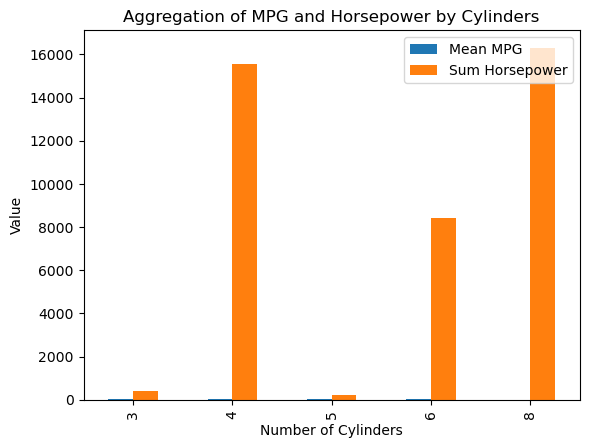

In [16]:
## Begin Example
# Group by 'cylinders' and calculate the mean of 'mpg' and the sum of 'horsepower'
cylinders_agg_dict = mpg_df.groupby('cylinders').agg({'mpg': 'mean', 'horsepower': 'sum'})
print(cylinders_agg_dict)

# Create a plot
plt.figure(figsize=(10, 6))
cylinders_agg_dict.plot(kind='bar')
plt.title('Aggregation of MPG and Horsepower by Cylinders')
plt.xlabel('Number of Cylinders')
plt.ylabel('Value')
plt.legend(['Mean MPG', 'Sum Horsepower'])
plt.show()
## End Example

## Other Useful Aggregation Functions

Here are some other commonly used aggregation functions:

* __`count().`__: Number of non-null values in each group.

* __`min().`__: Minimum value in each group.

* __`max().`__: Maximum value in each group.

* __`any().`__: Returns True if any value in the group is True.

* __`all().`__: Returns True if all values in the group are True.

* __`median.`__(): Median value of each group.

* __`std().`__: Standard deviation of each group.

## Using Multiple Aggregation Functions


<center><img src="../images/stock/pexels-vividcafe-681335.jpg"></center>



             mean  median   min   max  count
origin                                      
europe  27.891429    26.5  16.2  44.3     70
japan   30.450633    31.6  18.0  46.6     79
usa     20.083534    18.5   9.0  39.0    249


<Figure size 1200x600 with 0 Axes>

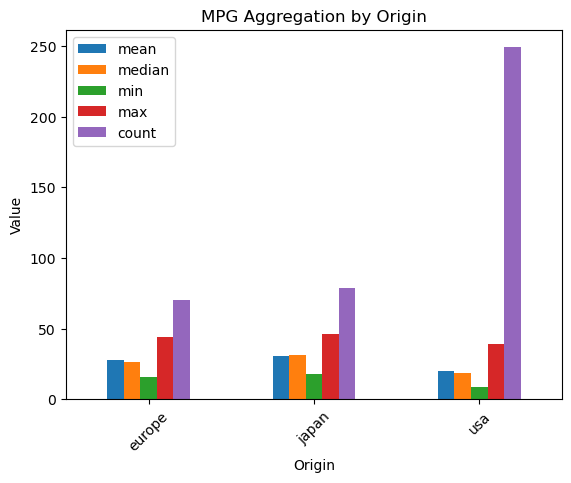

In [17]:
## Begin Example
# Group by 'origin' and calculate multiple aggregations for 'mpg'
origin_mpg_agg = mpg_df.groupby('origin')['mpg'].agg(['mean', 'median', 'min', 'max', 'count'])
print(origin_mpg_agg)

# Visualize
plt.figure(figsize=(12, 6))
origin_mpg_agg.plot(kind='bar')
plt.title('MPG Aggregation by Origin')
plt.xlabel('Origin')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()
## End Example

## Grouping by Multiple Columns

You can group by more than one column. This creates a hierarchical index in the resulting DataFrame.

origin  cylinders
europe  4            28.411111
        5            27.366667
        6            20.100000
japan   3            20.550000
        4            31.595652
        6            23.883333
usa     4            27.840278
        6            19.663514
        8            14.963107
Name: mpg, dtype: float64


<Figure size 1000x600 with 0 Axes>

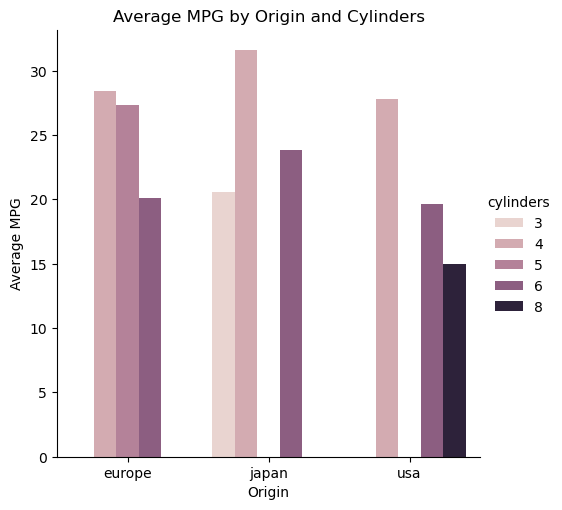

In [19]:
## Begin Example

# Group by 'origin' and 'cylinders' and calculate the mean 'mpg'
origin_cylinders_mpg_mean = mpg_df.groupby(['origin', 'cylinders'])['mpg'].mean()
print(origin_cylinders_mpg_mean)

# Group by 'origin' and 'cylinders' and calculate the mean 'mpg'
origin_cylinders_mpg_mean = mpg_df.groupby(['origin', 'cylinders'])['mpg'].mean().reset_index()

# Create a plot
plt.figure(figsize=(10, 6))
sns.catplot(x='origin', y='mpg', hue='cylinders', data=origin_cylinders_mpg_mean, kind='bar')
plt.title('Average MPG by Origin and Cylinders')
plt.xlabel('Origin')
plt.ylabel('Average MPG')
plt.show()
## End Example

## Resetting the Index

When you group by multiple columns, the resulting DataFrame has a hierarchical index. To make the grouping columns regular columns, use `reset_index()`.

In [20]:
## Begin Example
# Group by 'origin' and 'cylinders' and calculate the mean 'mpg', then reset the index
origin_cylinders_mpg_mean_reset = mpg_df.groupby(['origin', 'cylinders'])['mpg'].mean().reset_index()
print(origin_cylinders_mpg_mean_reset)

## End Example

   origin  cylinders        mpg
0  europe          4  28.411111
1  europe          5  27.366667
2  europe          6  20.100000
3   japan          3  20.550000
4   japan          4  31.595652
5   japan          6  23.883333
6     usa          4  27.840278
7     usa          6  19.663514
8     usa          8  14.963107
